In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split




In [5]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/Lab4/data.csv"
df = pd.read_csv(url, sep=",")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var1    1000 non-null   int64  
 1   Var2    1000 non-null   int64  
 2   Var3    1000 non-null   int64  
 3   Var4    1000 non-null   int64  
 4   Var5    1000 non-null   int64  
 5   Var6    1000 non-null   int64  
 6   Result  1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


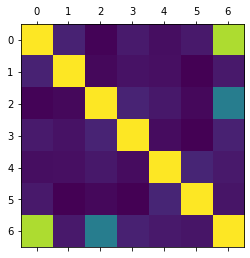

,Var1,Var2,Var3,Var4,Var5,Var6,Result
Var1,1.000000,0.056326,-0.035236,0.033317,-0.004222,0.029818,0.871279
Var2,0.056326,1.000000,-0.019266,0.005555,-0.000932,-0.043397,0.028140
Var3,-0.035236,-0.019266,1.000000,0.059719,0.023266,-0.021135,0.397683
Var4,0.033317,0.005555,0.059719,1.000000,-0.008156,-0.040191,0.053928
Var5,-0.004222,-0.000932,0.023266,-0.008156,1.000000,0.063654,0.028496
Var6,0.029818,-0.043397,-0.021135,-0.040191,0.063654,1.000000,0.017604
Result,0.871279,0.028140,0.397683,0.053928,0.028496,0.017604,1.000000


In [10]:
#ploting the correlation matrix
correlationMartix = df.corr()
plt.matshow(correlationMartix)
plt.show()

correlationMartix.style.background_gradient(cmap='coolwarm')

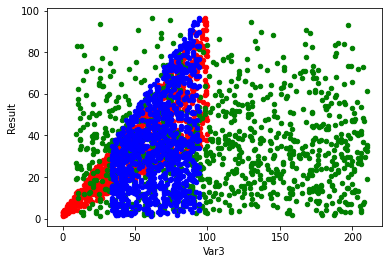

In [14]:
#df.plot.scatter(x="Var3", y='Result')
ax1 = df.plot(kind='scatter', x='Var1', y='Result', color='r')
ax2 = df.plot(kind='scatter', x='Var2', y='Result', color='g', ax=ax1)
ax3 = df.plot(kind='scatter', x='Var3', y='Result', color='b', ax=ax1)

In [23]:
#Scaling the dataframe: 
x = df.values
scaler = preprocessing.MinMaxScaler().fit(x)
x = scaler.transform(x)
df2 = pd.DataFrame(x)
df2.head()
#df[list(df.columns)] = scaler.transform(df) #for keeping the column names

## unscaling the df: 
#x = df2.values
#x = scaler.inverse_transform(x)
#df = pd.DataFrame(x)

,0,1,2,3,4,5,6
0,0.33,0.980100,0.883333,0.909091,0.333333,0.173913,0.316139
1,0.49,0.024876,0.866667,0.439394,0.000000,0.391304,0.452153
2,0.79,0.313433,0.933333,0.621212,0.166667,0.217391,0.764607
3,0.28,0.815920,0.250000,0.696970,0.000000,0.217391,0.143384
4,0.62,0.895522,0.966667,0.393939,0.166667,0.869565,0.613644


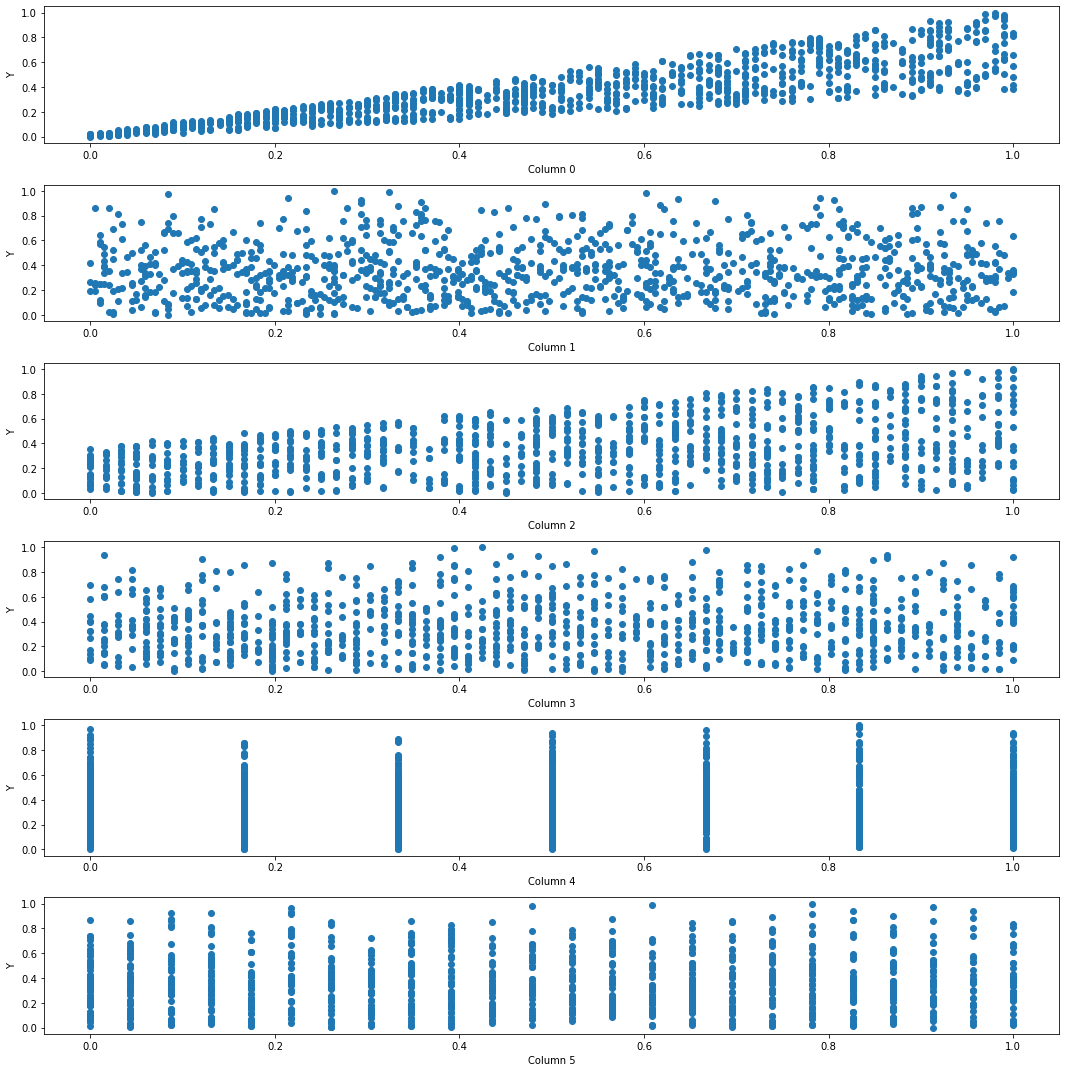

In [27]:
fig, ax = plt.subplots(df2.shape[1]-1, figsize=(15, 15))
for i in range(df2.shape[1]-1):
    ax[i].scatter(x=df2[i], y=df2[6])
    ax[i].set_xlabel("Column " + str(i))
    ax[i].set_ylabel("Y")
    
fig.tight_layout()
plt.show()

 ### Traning a model:

In [30]:
#revesing the scale to df3: 
x1 = df2.values
x1 = scaler.inverse_transform(x1)
df3 = pd.DataFrame(x1)
df3.head()

,0,1,2,3,4,5,6
0,33.0,206.0,87.0,81.0,2.0,4.0,31.34
1,49.0,14.0,86.0,50.0,0.0,9.0,44.26
2,79.0,72.0,90.0,62.0,1.0,5.0,73.94
3,28.0,173.0,49.0,67.0,0.0,5.0,14.93
4,62.0,189.0,92.0,47.0,1.0,20.0,59.60


In [34]:
#Spliting the data for training:
X = pd.DataFrame(df3[0])
Y = pd.DataFrame(df3[6]) #result column
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


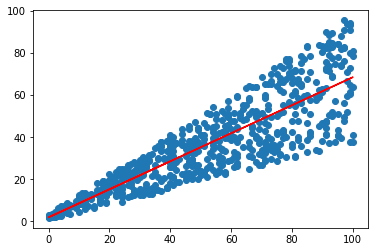

MSE = 116.45444051948107


In [35]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
Y_pred = linear_regressor.predict(X_train)

plt.scatter(X_train, Y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print("MSE = " + str(metrics.mean_squared_error(Y_train, Y_pred)))

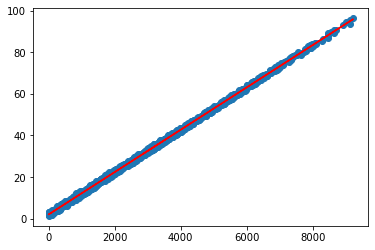

MSE = 0.42183880985144323


In [38]:
df3[7] = df3[0]*df3[2] #new feauter var1=column0 * var3=column2
X1 = pd.DataFrame(df3[7])
Y1 = pd.DataFrame(df3[6])

linear_regressor.fit(X1,Y1)
Y_pred1 = linear_regressor.predict(X1)
plt.scatter(X1,Y1)
plt.plot(X1, Y_pred1, color='red')
plt.show()
print("MSE = " + str(metrics.mean_squared_error(Y1, Y_pred1)))


In [41]:
url2 = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/Lab4/data_test.csv"
df_4 = pd.read_csv(url, sep=",")
df_4["Combined"] = df_4["Var1"]*df_4["Var3"]
df_4.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Result,Combined
0,33,206,87,81,2,4,31.34,2871
1,49,14,86,50,0,9,44.26,4214
2,79,72,90,62,1,5,73.94,7110
3,28,173,49,67,0,5,14.93,1372
4,62,189,92,47,1,20,59.60,5704


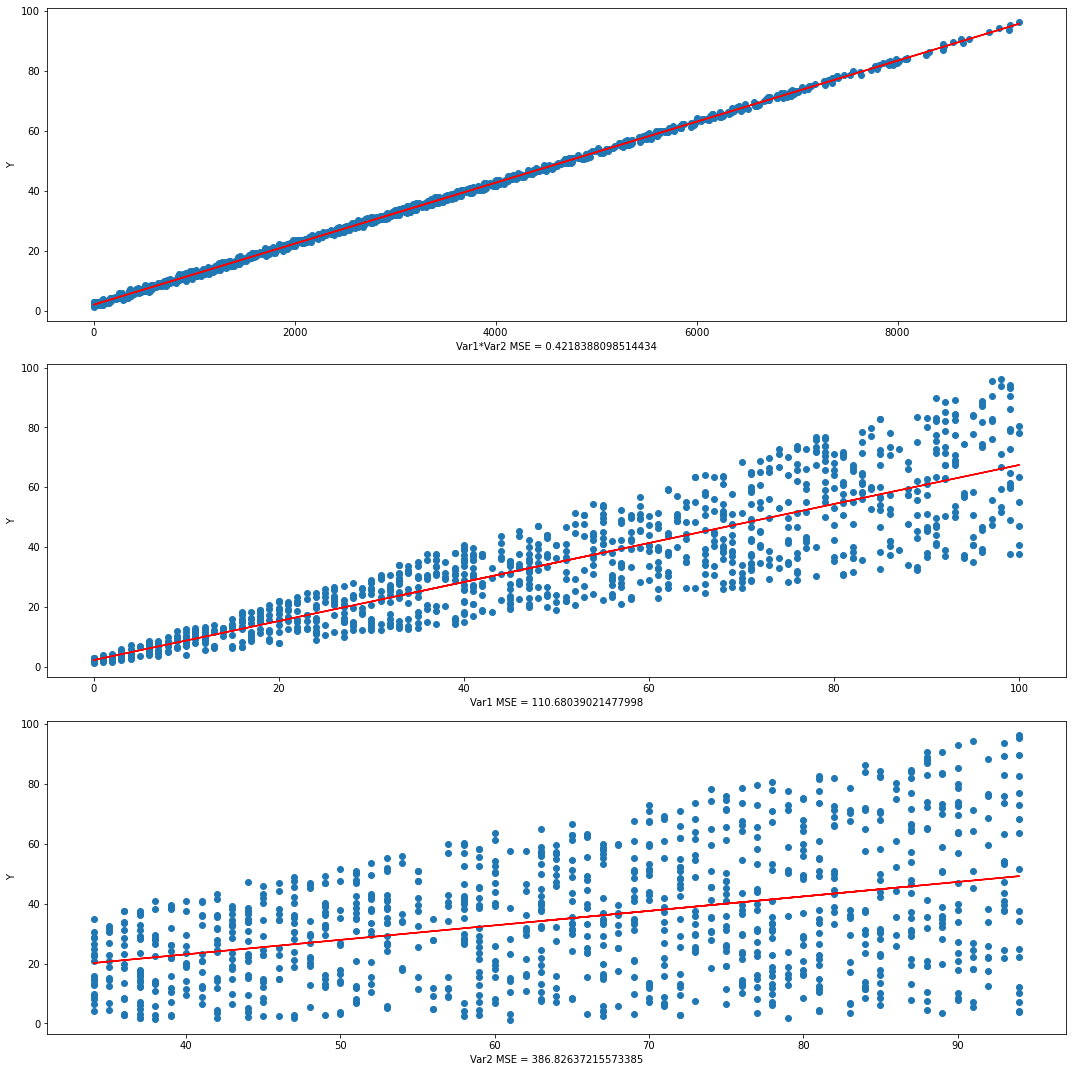

In [43]:
X3 = pd.DataFrame(df_4["Combined"])
Y3 = pd.DataFrame(df_4["Result"])
X3_1 = pd.DataFrame(df_4["Var1"])
X3_2 = pd.DataFrame(df_4["Var3"])

#test set:
Xt = pd.DataFrame(df3[7])
X1t = pd.DataFrame(df3[0])
X2t = pd.DataFrame(df3[2])
Yt = pd.DataFrame(df3[6])

dataSet = [X3, X3_1, X3_2]
trainingSet = [Xt, X1t, X2t]

#ploting: 
fig, ax = plt.subplots(3, figsize=(15, 15))
models = [] #List to save the different model for later use
caps = ["Var1*Var2", "Var1", "Var2"] #Caption for the plots
MSE = [] #list to save mean square error
for i in range(3):  
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(trainingSet[i], Yt)  # perform linear regression
    Y_pred2 = linear_regressor.predict(dataSet[i])  # make predictions
    ax[i].scatter(dataSet[i], Y3) #Plot blue dots from test set
    ax[i].plot(dataSet[i], Y_pred2, color='red') #Plot predicted from train
    err=metrics.mean_squared_error(Y3,Y_pred2)
    ax[i].set_xlabel(caps[i] + " MSE = " +str(err )) #Set caption
    ax[i].set_ylabel("Y") #Set y lable
    MSE.append(err) #Calculate and save mse for model
    models.append(linear_regressor) #Save
fig.tight_layout()
plt.show()


In [44]:
v1=models[0].predict([[79*36]]) #Make a prediction on and store the result in V1
#Var 1
v2=models[1].predict([[79]])
#Var3
v3=models[1].predict([[36]])
print(f"Prediction with:\nVar1*Var3 = {v1[0][0]}\nVar1 = {v2[0][0]}\nVar3 = {v3[0][0]}")
print("Correct value = 31.61")

Prediction with:
Var1*Var3 = 30.950911117701494
Var1 = 53.80770756065712
Var3 = 25.798240104353773
Correct value = 31.61


In [48]:
import pickle
filename = "my_model.sav"
pickle.dump(models[0], open(filename, 'wb'))

#loading the model again:
loaded_model = pickle.load(open(filename,"rb"))
loaded_model.predict([[79*36]])

array([[30.95091112]])